## Loading Data and Basic Exploration

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
import seaborn as sns
from scipy import stats
from sklearn.model_selection import StratifiedKFold, cross_val_predict, LeaveOneOut, train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, recall_score

In [4]:
os.chdir(r"C:\Users\belikovm\Desktop")
data = pd.read_csv("winequality-red.csv")
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


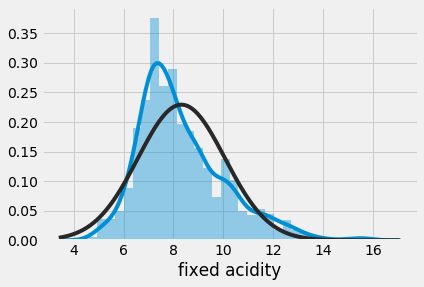

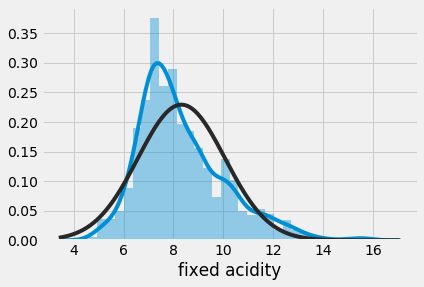

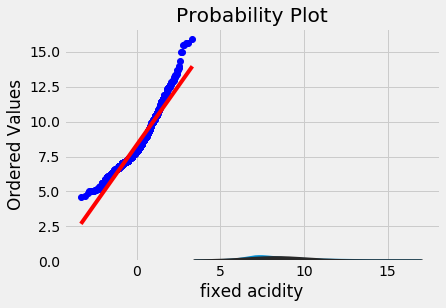

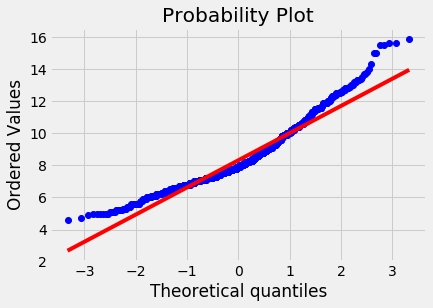

In [29]:
from scipy.stats import norm
sns.distplot(data['fixed acidity'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['fixed acidity'], plot=plt)
plt.show()

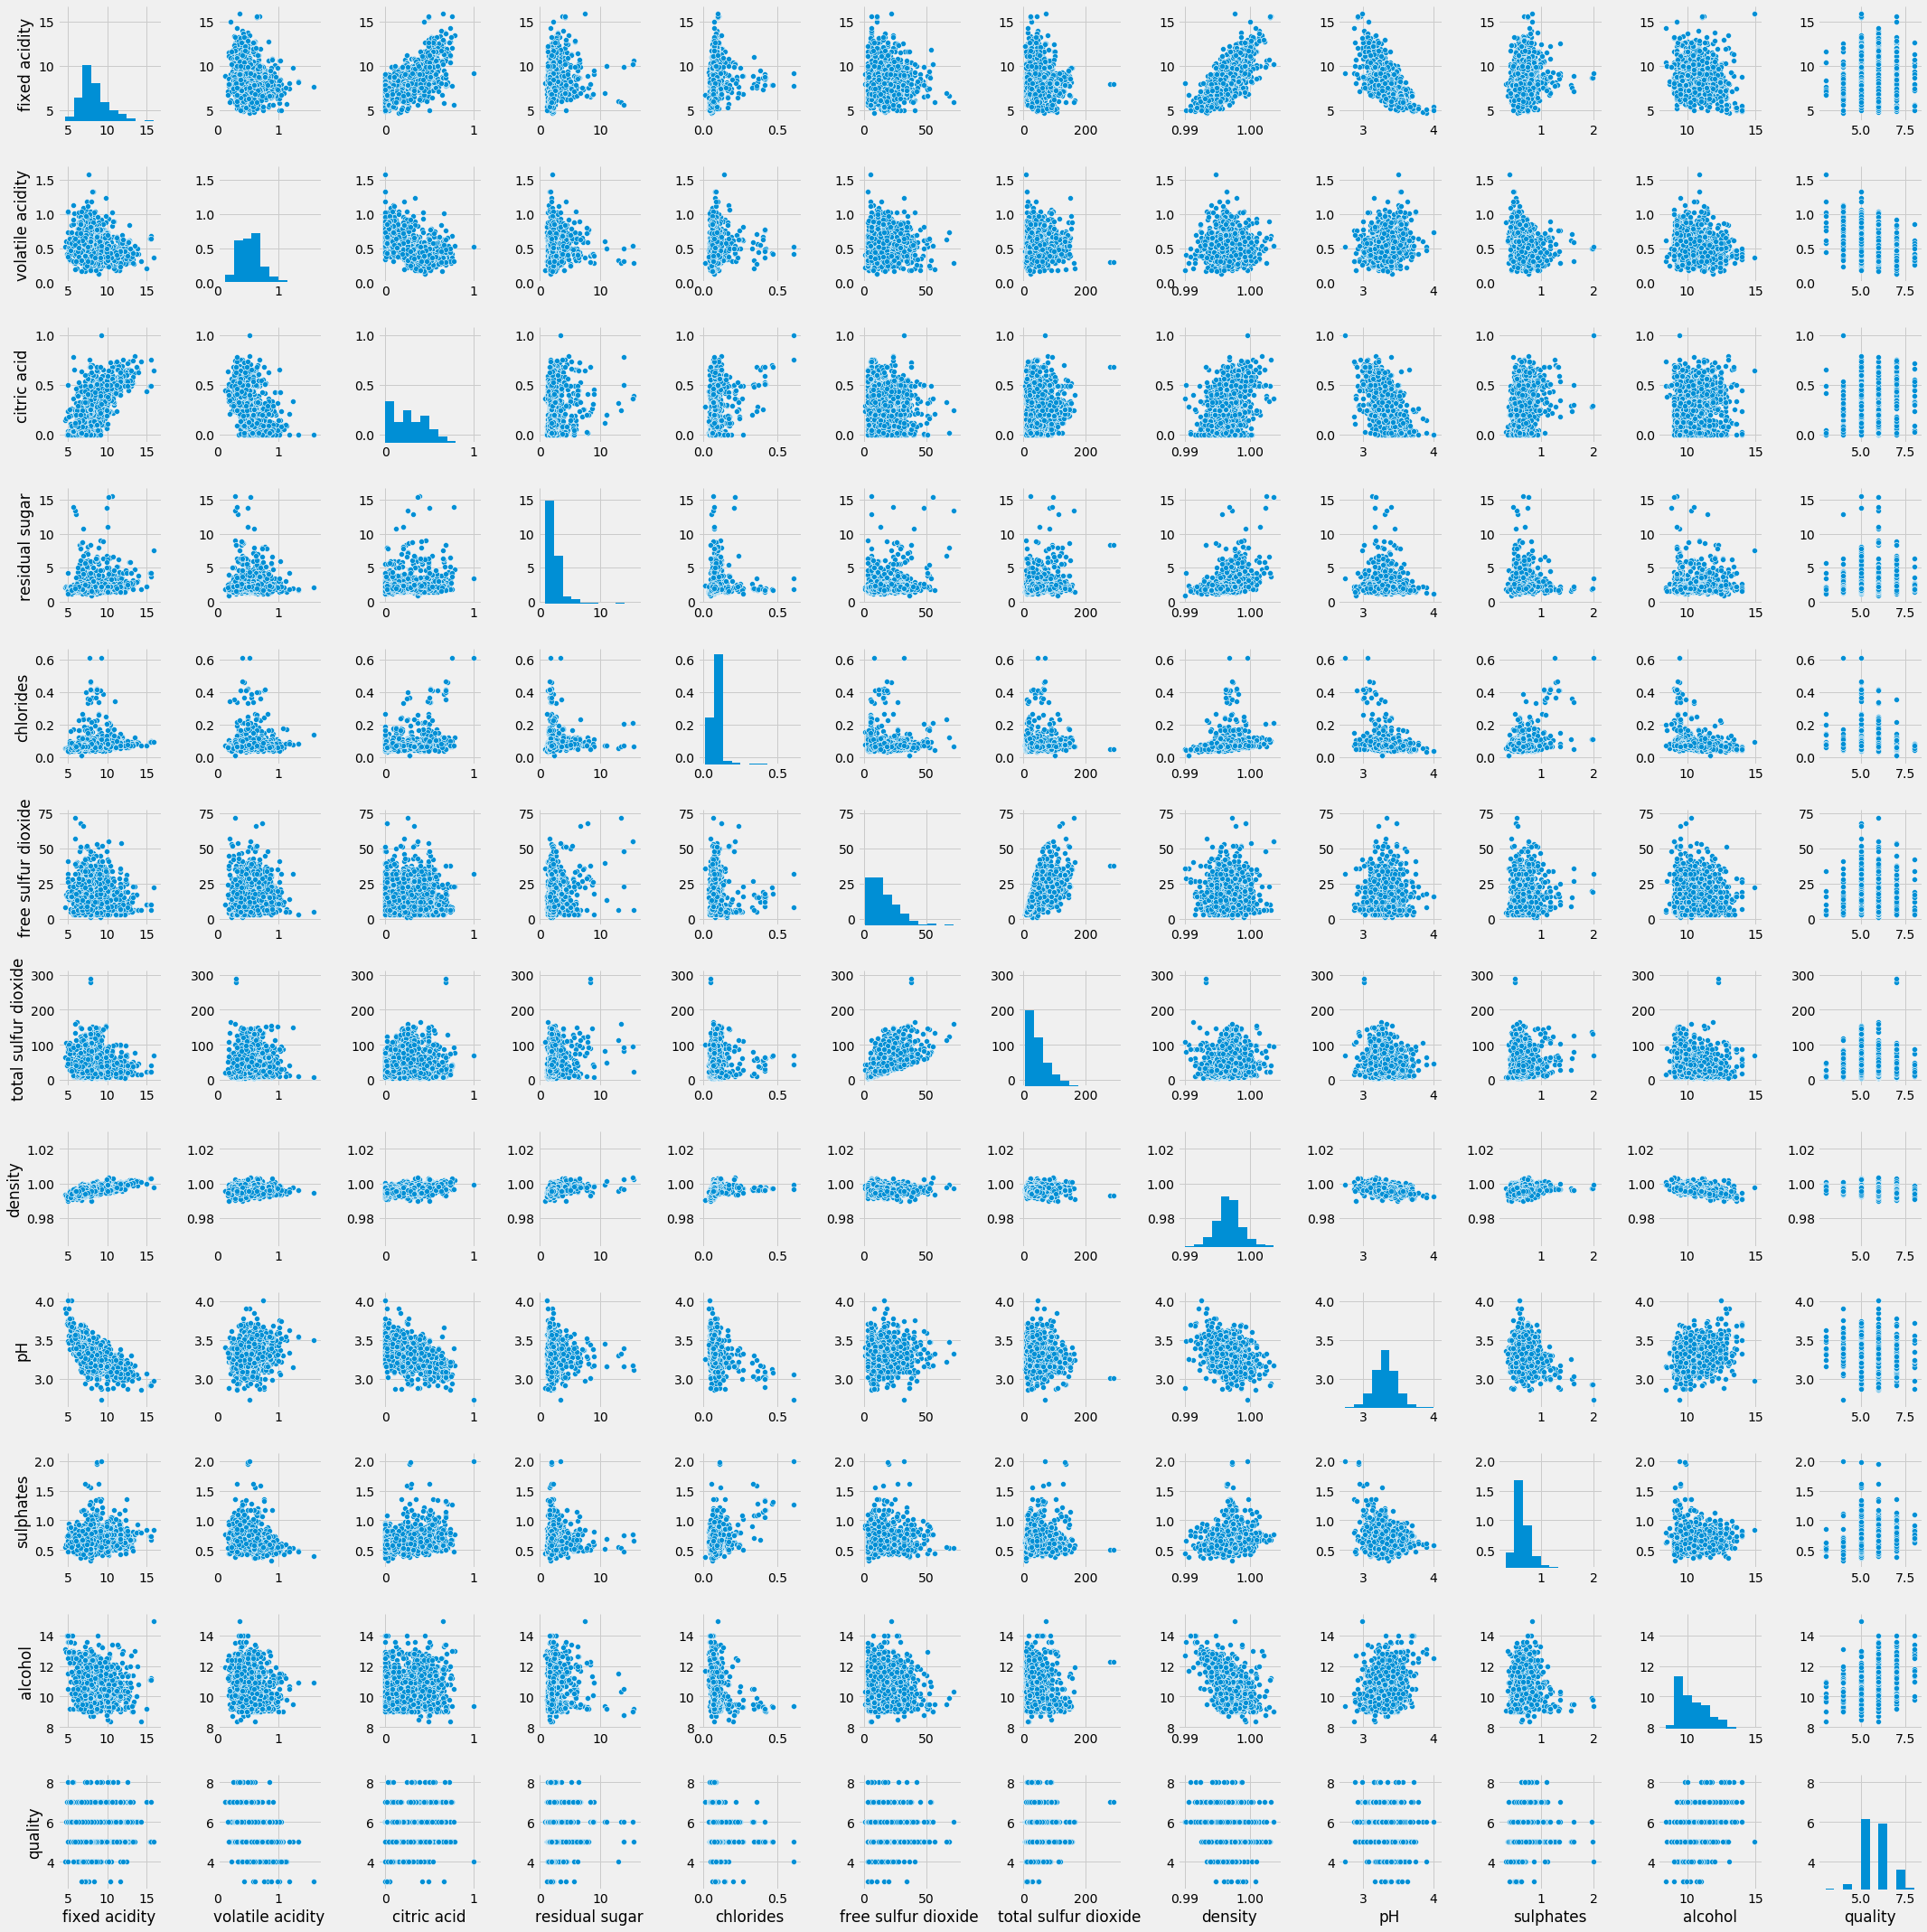

In [30]:
sns.pairplot(data)
plt.show()

# Data Preprocessing



In [5]:
# adding a conditional column for the quality class
conditions = [
    (data['quality'] >= 7),
    (data['quality'] <= 5)]
choices = ['3', '1']
data['quality class'] = np.select(conditions, choices, default='2')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

# Training the Decision Tree

In [6]:
label = data.pop('quality class')
data.pop('quality')

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [46]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, criterion='gini',min_samples_leaf=1)
decision_tree.fit(data, label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
from sklearn.model_selection import cross_val_score
accuracy_data = cross_val_score(decision_tree, data, label, cv=10, scoring='accuracy')
print (accuracy_data)
prediction = cross_val_predict(decision_tree, data, label, cv=10)
print(classification_report(label, prediction))
decision_tree.score(data,label)	

[ 0.58878505  0.53271028  0.615625    0.59874608  0.60377358]
             precision    recall  f1-score   support

          1       0.67      0.70      0.69       744
          2       0.51      0.55      0.53       638
          3       0.49      0.30      0.38       217

avg / total       0.58      0.59      0.58      1599



0.66228893058161353

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
#random forest with 10-fold cross validation and 200 trees
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(data, label)
pred_rfc = cross_val_predict(rfc, data, label, cv=10)
print(classification_report(label, pred_rfc))


             precision    recall  f1-score   support

          1       0.68      0.75      0.71       744
          2       0.54      0.54      0.54       638
          3       0.57      0.36      0.45       217

avg / total       0.61      0.61      0.61      1599



In [16]:
# Random Forest with 80/20 split and 200 trees, does not improve noticeably after that
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1337)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
rfcn = RandomForestClassifier(n_estimators=200)
rfcn.fit(X_train, y_train)
pred_rfc = rfcn.predict(X_test)
print(classification_report(y_test, pred_rfc))



             precision    recall  f1-score   support

          1       0.80      0.82      0.81       158
          2       0.66      0.69      0.67       121
          3       0.73      0.54      0.62        41

avg / total       0.74      0.73      0.73       320



In [50]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1337).fit(data, label)

pred_GBC = cross_val_predict(GBC, data, label, cv=10)

print(classification_report(label, pred_GBC))
GBC.score(data,label)	



             precision    recall  f1-score   support

          1       0.68      0.72      0.70       744
          2       0.53      0.54      0.53       638
          3       0.52      0.39      0.45       217

avg / total       0.60      0.60      0.60      1599



0.93120700437773607

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ABC= AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=1337).fit(data, label)

pred_ABC = cross_val_predict(ABC, data, label, cv=10)

print(classification_report(label, pred_ABC))
ABC.score(data,label)	

             precision    recall  f1-score   support

          1       0.71      0.71      0.71       744
          2       0.53      0.63      0.58       638
          3       0.61      0.24      0.35       217

avg / total       0.62      0.62      0.61      1599



0.64415259537210756

In [48]:
xt = sc.fit_transform(X)
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(xt, label)
prediction = cross_val_predict(rfc2, xt, label, cv=10)
print(classification_report(label, prediction))
rfc2.score(data,label)	

             precision    recall  f1-score   support

          1       0.68      0.74      0.71       744
          2       0.54      0.55      0.54       638
          3       0.56      0.37      0.45       217

avg / total       0.61      0.61      0.61      1599



0.46529080675422141

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=1337)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=1337)
results = model_selection.cross_val_score(model, X, Y, cv=10)
print(results.mean())



# Balancing the Data

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc = StandardScaler()
x_balanced = sc.fit_transform(data)


[[-0.52835961  0.96187667 -1.39147228 ...,  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ..., -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ..., -0.33117661 -0.04808883
  -0.58477711]
 ..., 
 [-1.1603431  -0.09955388 -0.72391627 ...,  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...,  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...,  0.51112954  0.01092425
   0.54162988]]
